In [3]:
import pandas as pd
df=pd.read_csv('new_data.csv')
df=df[(df.type_char!='file_folder')&(df.type_char!='handwritten')]

In [4]:
#nettoyage de text 
import re
import unicodedata
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
stop_words.update(["." , ",",':','?'])
stop_words=list(stop_words)
stop_words.extend(stopwords.words('french'))
def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn')

def preprocess_sentence(w):
    w = unicode_to_ascii(str(w).lower().strip())
    # creating a space between a word and the punctuation following it
    # eg: "he is a boy." => "he is a boy ."
    w = re.sub(r"([?.!,¿])", r" \1 ", w)
    w = re.sub(r'[" "]+', " ", w)
    # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
    w = re.sub(r"[^a-zA-Z?.!]+", " ", w)
    w = re.sub(r'\b\w{0,2}\b', '', w)

    # remove stopword
    mots = word_tokenize(w.strip())
    mots = [mot for mot in mots if mot not in stop_words]
    return ' '.join(mots).strip()

In [5]:
df.text_image = df.text_image.apply(lambda x :preprocess_sentence(x))
df.head()

,Unnamed: 0,filename,type,text_image,type_char
0,0,img_0000000.jpg,0,facture logo joanna binet coubertin paris fact...,facture
1,1,img_0000001.jpg,0,joanna binet coubertin paris facture facture c...,facture
2,2,img_0000002.jpg,0,facture entreprise nom societe adresse postale...,facture
3,3,img_0000003.jpg,0,joanna binet coubertin paris facture cendrillo...,facture
4,4,img_0000004.jpg,0,payer ligne facture sfideli date creation date...,facture


In [6]:
#afficher le graphe des mots les plus répéter
total_mots=[]
total_mots1=[phrase.split() for phrase in df.text_image]
for liste in total_mots1:
    total_mots.extend(liste)    

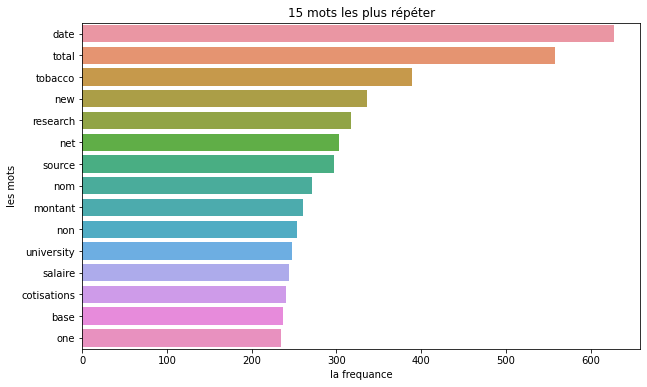

In [7]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
dico= Counter(total_mots)
mots = [m[0] for m in dico.most_common(15)]
freq = [m[1] for m in dico.most_common(15)]
plt.figure(figsize= (10,6))
sns.barplot(x=freq,y=mots)
plt.xlabel('la frequance')
plt.ylabel('les mots')
plt.title('15 mots les plus répéter');

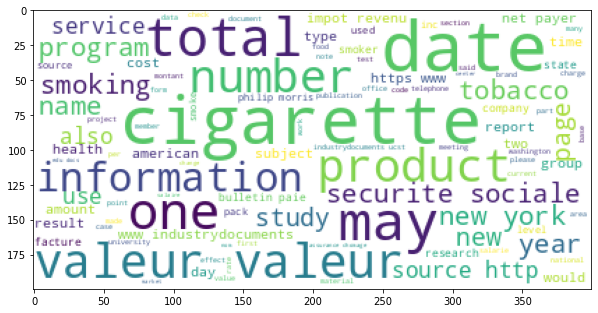

In [8]:
from  wordcloud import  WordCloud
wc= WordCloud(background_color = 'white', stopwords=stop_words, max_words = 100,max_font_size=50, random_state=42)
plt.figure(figsize= (10,6)) 
wc.generate(' '.join(total_mots))          
plt.imshow(wc) 
plt.show()

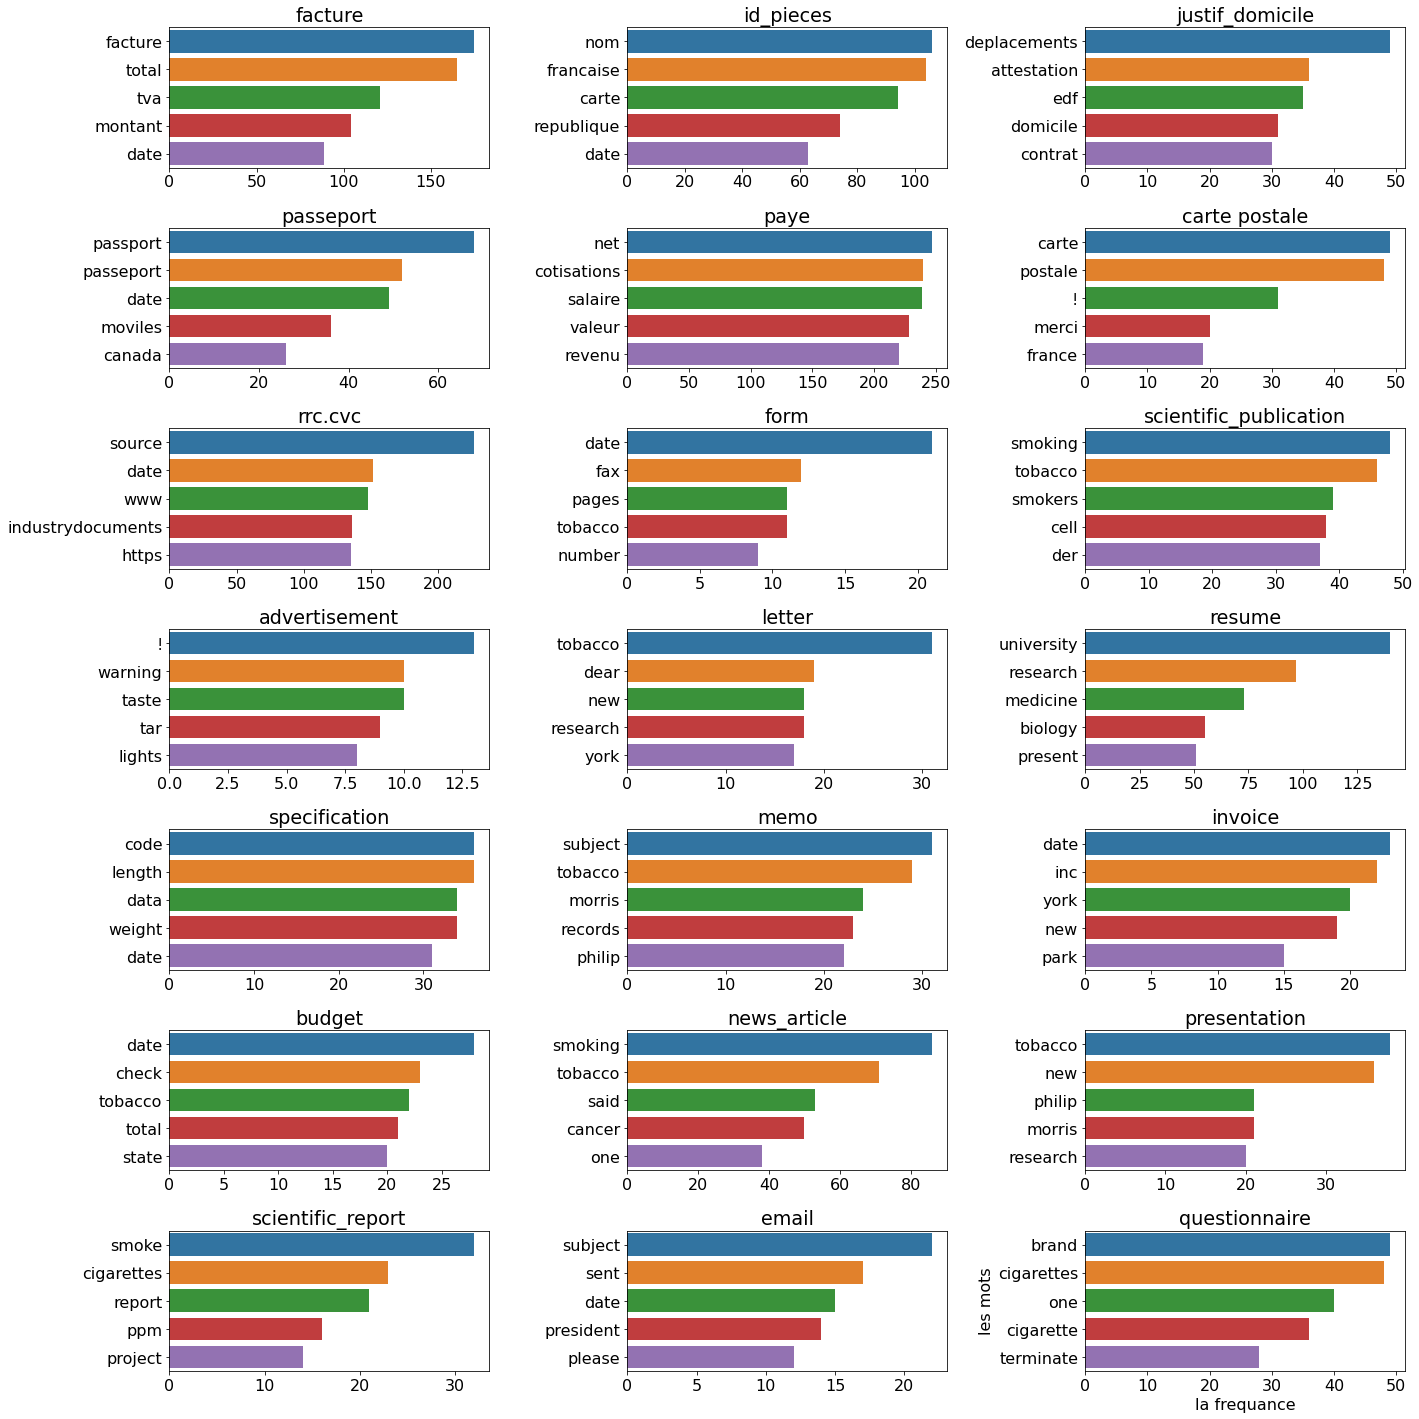

In [9]:
#afficher le graphe des mots les plus répéter pour chaque catégorie
liste_mots_type=[]
r=0
c=0
plt.rcParams.update({'font.size': 16})
fig, axs = plt.subplots(7, 3, figsize=(20,20))
for i in df.type_char.unique():
    for liste in [phrase.split() for phrase in df[df.type_char==i].text_image]:
        liste_mots_type.extend(liste)
    dico= Counter(liste_mots_type)
    mots = [m[0] for m in dico.most_common(5)]
    freq = [m[1] for m in dico.most_common(5)]
    sns.barplot(x=freq,y=mots,ax = axs[r][c]).set(title='' + i)
    plt.xlabel('la frequance')
    plt.ylabel('les mots')
    liste_mots_type.clear()
    c+=1
    if(c==3):c=0;r+=1
plt.tight_layout() 
plt.show()    
        


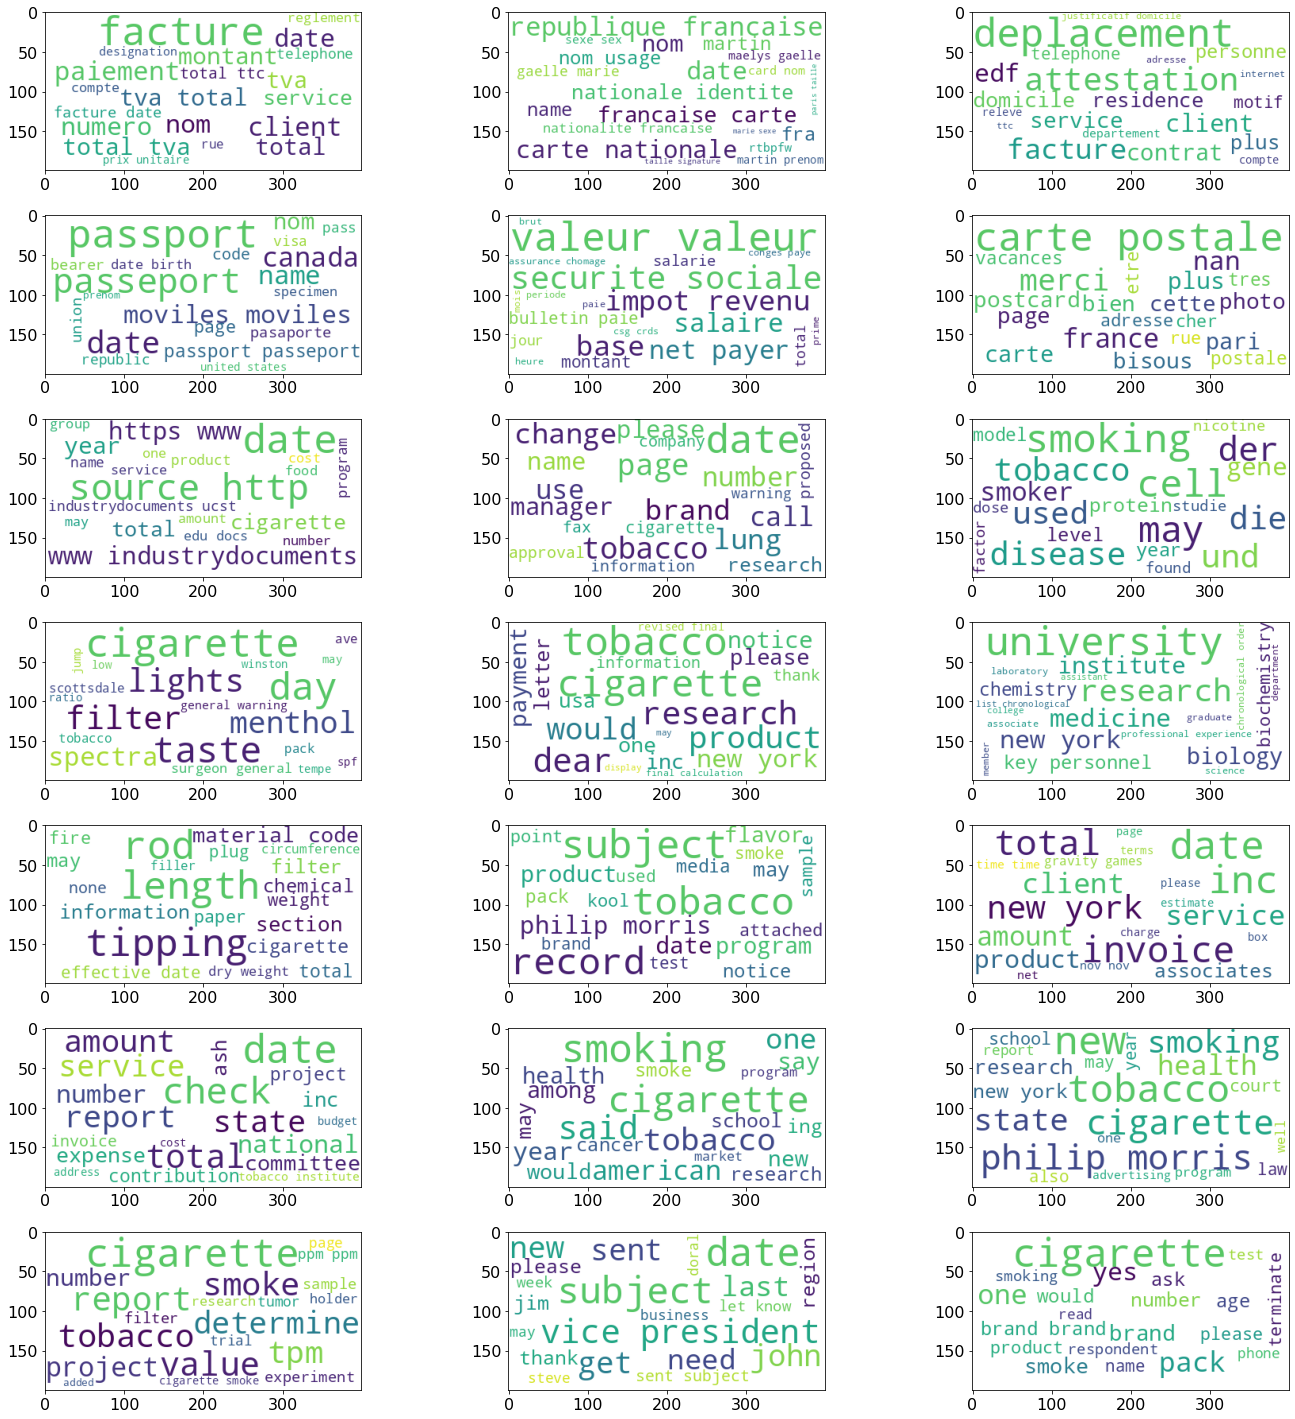

In [10]:
liste_mots_type=[]
r=0
c=0
plt.rcParams.update({'font.size': 16})
fig, axs = plt.subplots(7, 3, figsize=(20,20))
for i in df.type_char.unique():
    for liste in [phrase.split() for phrase in df[df.type_char==i].text_image]:
        liste_mots_type.extend(liste)
    wc= WordCloud(background_color = 'white', stopwords=stop_words, max_words = 20,max_font_size=50, random_state=42) 
    wc.generate(' '.join(liste_mots_type))          
    axs[r,c].imshow(wc) 
    liste_mots_type.clear()
    c+=1
    if(c==3):c=0;r+=1
plt.tight_layout() 
plt.show()


In [15]:
#les phrase les plus répéter pour chaque catégorie
def n_gram(summary,n):
    """Transforme une liste de mots en une liste de n-grams
    n:nombre de mots dans la phrase
    summary:liste des pots
                                     """
    new_list=[]
    list_temp=[]
    for i in range(len(summary)+1-n):
        new_list.append(' '.join([k for k in summary[i:n+i]]))
    return new_list



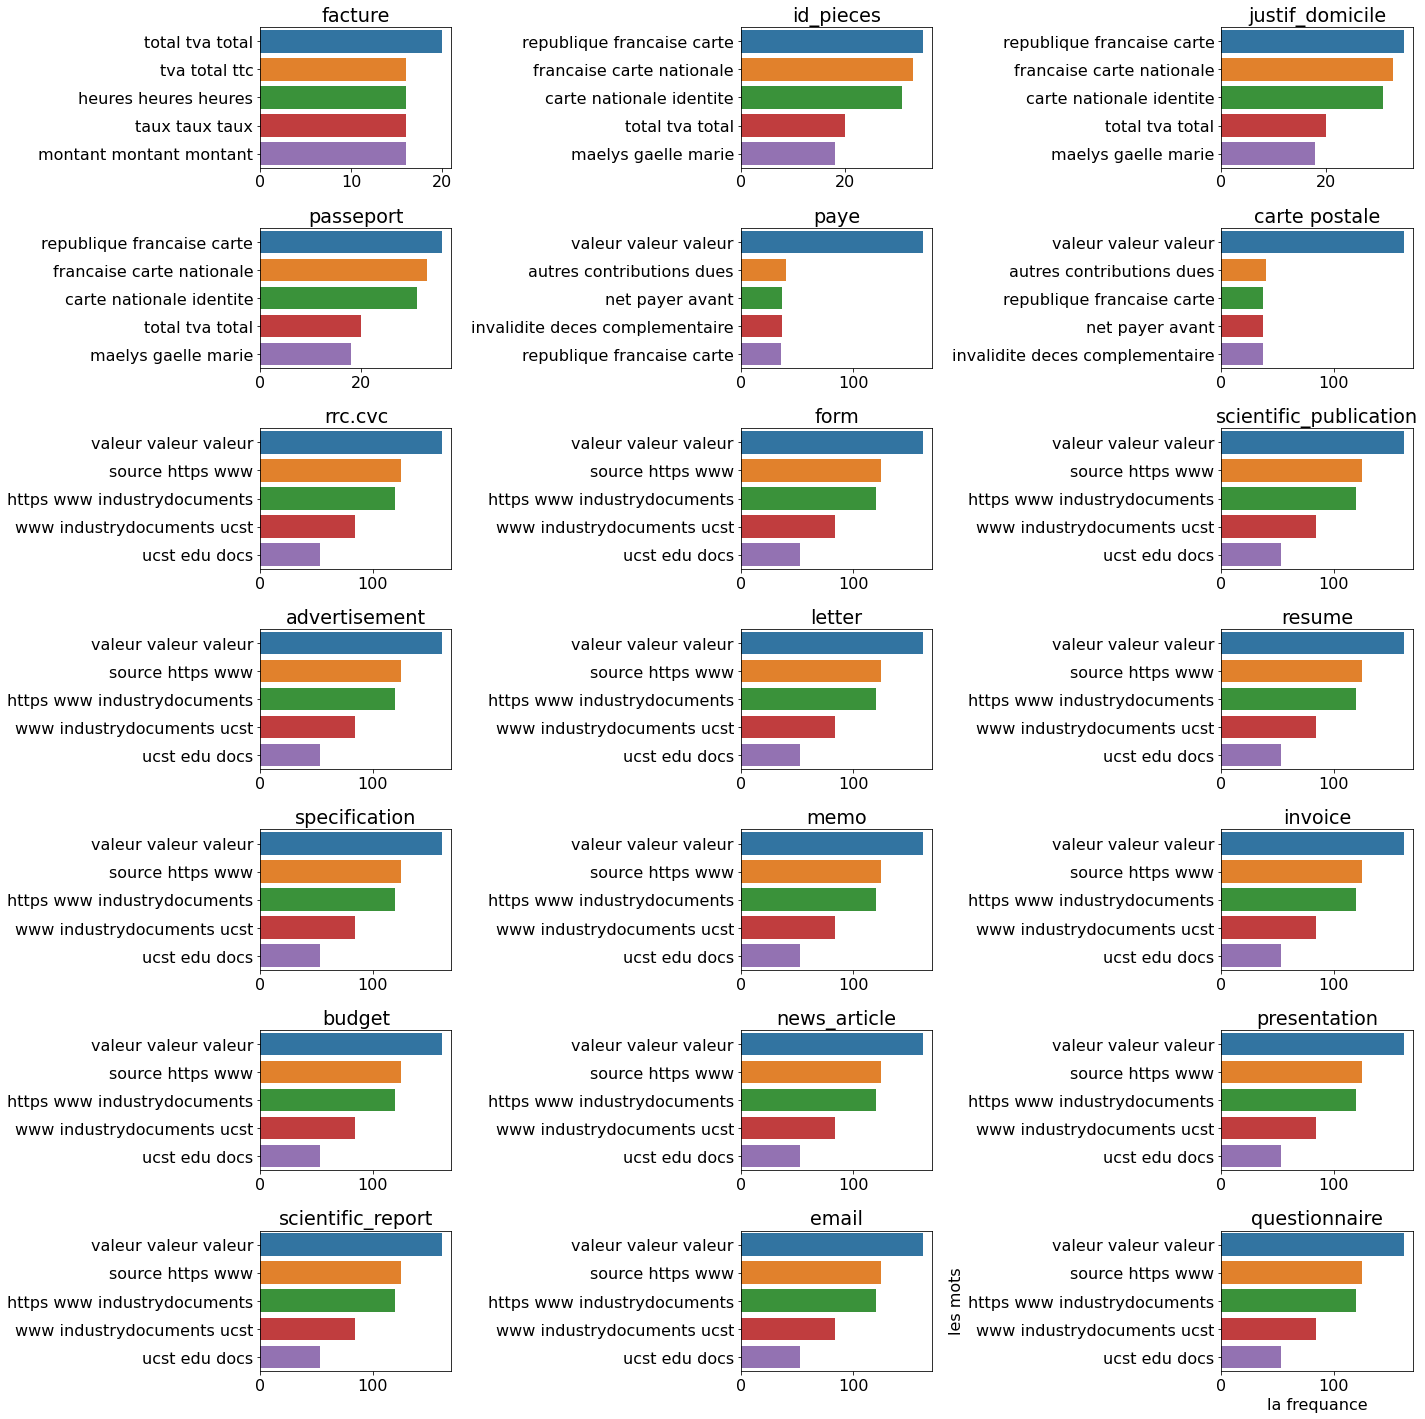

In [14]:
#les phrases avec 3 mot
liste_phrase_type=[]
r=0
c=0
plt.rcParams.update({'font.size': 16})
fig, axs = plt.subplots(7, 3, figsize=(20,20))
for i in df.type_char.unique():
    for liste in [phrase.split() for phrase in df[df.type_char==i].text_image]:
        liste_phrase_type.extend(liste)
    dico= Counter(n_gram(liste_phrase_type,3))
    mots = [m[0] for m in dico.most_common(5)]
    freq = [m[1] for m in dico.most_common(5)]
    sns.barplot(x=freq,y=mots,ax = axs[r][c]).set(title='' + i)
    plt.xlabel('la frequance')
    plt.ylabel('les mots')
    liste_mots_type.clear()
    c+=1
    if(c==3):c=0;r+=1
plt.tight_layout() 
plt.show()

    
    

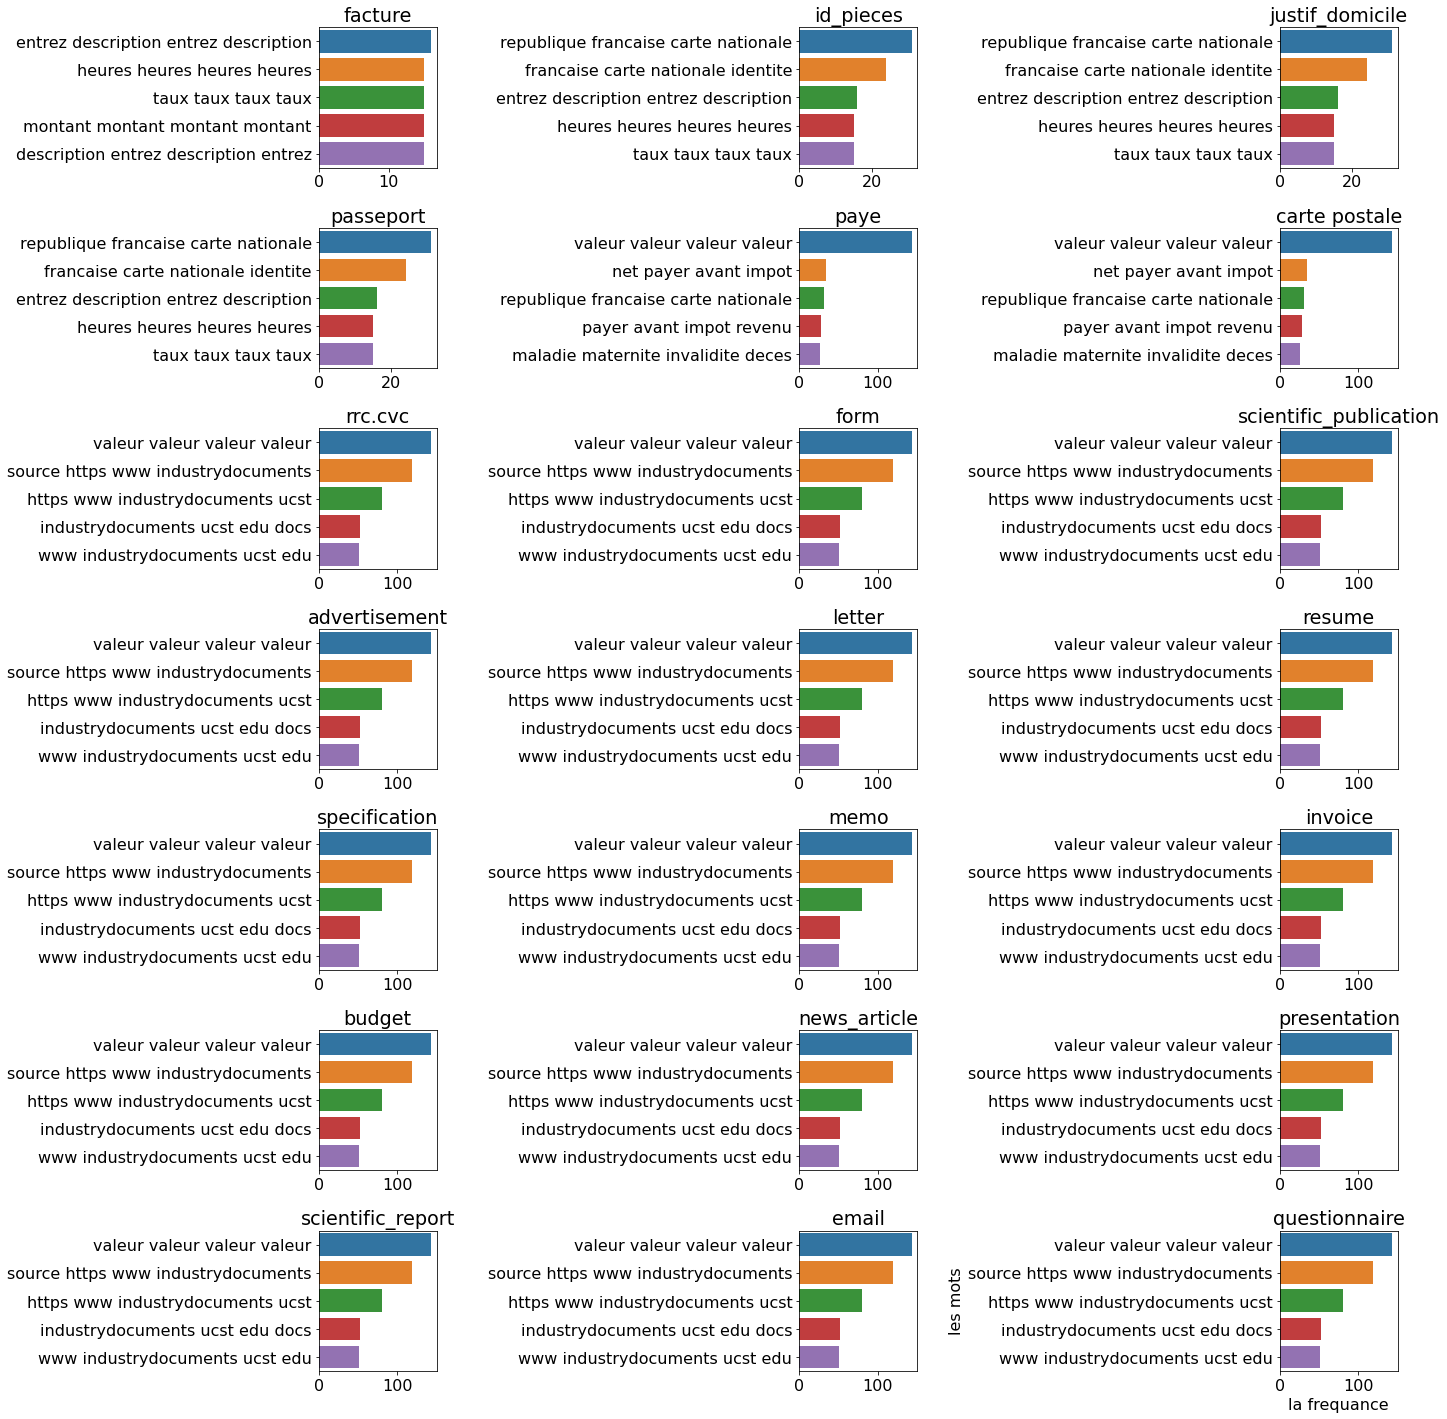

In [109]:
#les phrases avec 4 mot
liste_phrase_type=[]
r=0
c=0
plt.rcParams.update({'font.size': 16})
fig, axs = plt.subplots(7, 3, figsize=(20,20))
for i in df.type_char.unique():
    for liste in [phrase.split() for phrase in df[df.type_char==i].text_image]:
        liste_phrase_type.extend(liste)
    dico= Counter(n_gram(liste_phrase_type,4))
    mots = [m[0] for m in dico.most_common(5)]
    freq = [m[1] for m in dico.most_common(5)]
    sns.barplot(x=freq,y=mots,ax = axs[r][c]).set(title='' + i)
    plt.xlabel('la frequance')
    plt.ylabel('les mots')
    liste_mots_type.clear()
    c+=1
    if(c==3):c=0;r+=1
plt.tight_layout() 
plt.show()
